got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149
got here 149

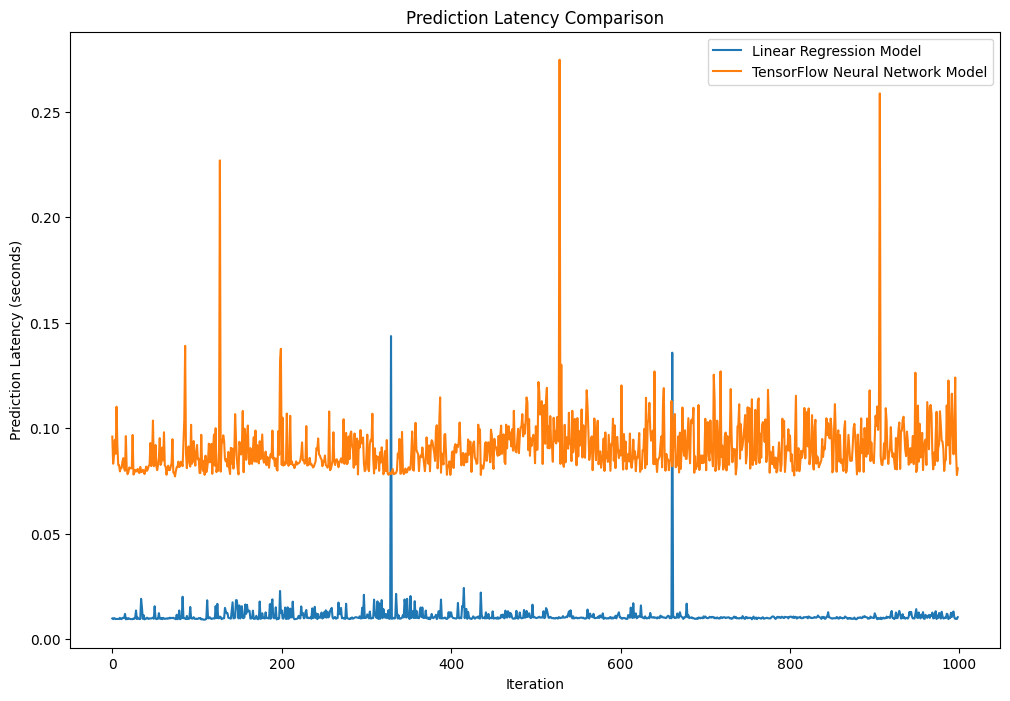

[0.096047000028193, 0.0831690999912098, 0.0871087999548763, 0.09450380003545433, 0.08789719990454614, 0.11018690001219511, 0.09193969995249063, 0.08255530009046197, 0.08251990005373955, 0.0795528000453487, 0.08125370007473975, 0.08117119991220534, 0.0841941999970004, 0.08581279998179525, 0.0809005000628531, 0.0798132000491023, 0.09626729995943606, 0.08096060005482286, 0.07820240000728518, 0.07913119997829199, 0.08143869997002184, 0.08100190002005547, 0.08101149997673929, 0.08099289995152503, 0.09681140002794564, 0.07802069990430027, 0.07892499992158264, 0.08028509991709143, 0.07951890002004802, 0.07974179997108877, 0.08072910003829747, 0.07908659998793155, 0.07879329996649176, 0.08167730004061013, 0.0792696001008153, 0.07928479998372495, 0.08031160000246018, 0.07999600004404783, 0.07827670010738075, 0.0799786999123171, 0.08181000000331551, 0.07979830005206168, 0.0807293999241665, 0.0821529000531882, 0.08272959990426898, 0.09296299994457513, 0.0820532999932766, 0.08819340006448328, 0.10

In [5]:
import time as t
from CustomModelRegistry import DataGenerator, ModelRegistry, MyLinearModel, get_env_dependencies
from datetime import datetime
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import warnings

warnings.filterwarnings("ignore")


# Set up Model Registry Table
driver_table_lr = ModelRegistry(datetime(1, 1, 1), 12, 2)  # For Linear Regression
driver_table_nn = ModelRegistry(datetime(1, 1, 1), 12, 2)  # For Neural Network

# Generate Sample Data
n_rows = 100
n_cols = 4
min_value = 1
max_value = 100
noise = 0.5
intercept = 5
slope = 12
start_dt = datetime(2023, 1, 1)

# Instantiate Data Generator Object
data = DataGenerator(start_dt, n_rows, n_cols, min_value, max_value, intercept, noise, slope)

# Get train/test data
X_train, X_test, y_train, y_test = data.get_train_test_data(datetime(2023, 1, 1), datetime(2023, 4, 11))

# Instantiate Linear Model/supplemental information & Train
myModel_lr = MyLinearModel()
myModel_lr.train(X_train.values, y_train.values)
myModel_lr.evaluate(X_test.values, y_test.values)

# Update driver table with new linear regression model
driver_table_lr.update(myModel_lr.model_pkl, myModel_lr.model_eval, get_env_dependencies(), datetime(2023, 4, 13))

# Instantiate and compile TensorFlow neural network model
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression task for y_train
])
tf_model.compile(optimizer='adam', loss='mean_squared_error')

# Convert X_train and y_train to NumPy arrays and ensure the right data type
X_train_np = np.array(X_train.values).astype(np.float32)
y_train_np = np.array(y_train.values).reshape(-1, 1).astype(np.float32)

# Train TensorFlow model
tf_model.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=0)

tf_pickle = pickle.dumps(tf_model)

# Update driver table with the new neural network model
driver_table_nn.update(tf_model, {'loss': 'mean_squared_error'}, get_env_dependencies(), datetime(2023, 4, 13))

# Prediction Latency Measurement
num_iterations = 1000

# For Linear Regression Predictions
prediction_times_lr = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Linear Regression
        driver_table_lr.update(myModel_lr.model_pkl, myModel_lr.model_eval, get_env_dependencies(), run_date)
        driver_table_lr._insert()

        start_time = t.perf_counter()
        # Time to predict
        driver_table_lr.predict(np.array([44, 44, 44, 44]).reshape(1, -1))[0]
        prediction_latency = t.perf_counter()
        prediction_times_lr.append(prediction_latency - start_time)
    except Exception as e:
        print(f"LR Prediction Error {i}: {e}")
        break

# For Neural Network Predictions
prediction_times_nn = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Neural Network
        driver_table_nn.update(tf_pickle, {'loss': 'mean_squared_error'}, get_env_dependencies(), run_date)

        start_time = t.perf_counter()
        # Time to predict
        driver_table_nn.predict(np.array([44, 44, 44, 44]).reshape(1, -1))
        prediction_latency = t.perf_counter()
        prediction_times_nn.append(prediction_latency - start_time)
    except Exception as e:
        print(f"NN Prediction Error {i}: {e}")
        break

print(f"Average Linear Regression Prediction Latency: {np.mean(prediction_times_lr):.6f} seconds")
print(f"Average TensorFlow Neural Network Prediction Latency: {np.mean(prediction_times_nn):.6f} seconds")



# Plot the prediction latencies for both models
plt.figure(figsize=(12, 8))
plt.plot(prediction_times_lr, label='Linear Regression Model')
plt.plot(prediction_times_nn, label='TensorFlow Neural Network Model')
plt.xlabel('Iteration')
plt.ylabel('Prediction Latency (seconds)')
plt.title('Prediction Latency Comparison')
plt.legend()
plt.show()

print(prediction_times_nn)


got here 149
got here 149
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
10
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
11
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
12
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
14
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
15
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
16
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
17
got here 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
18
got here 14

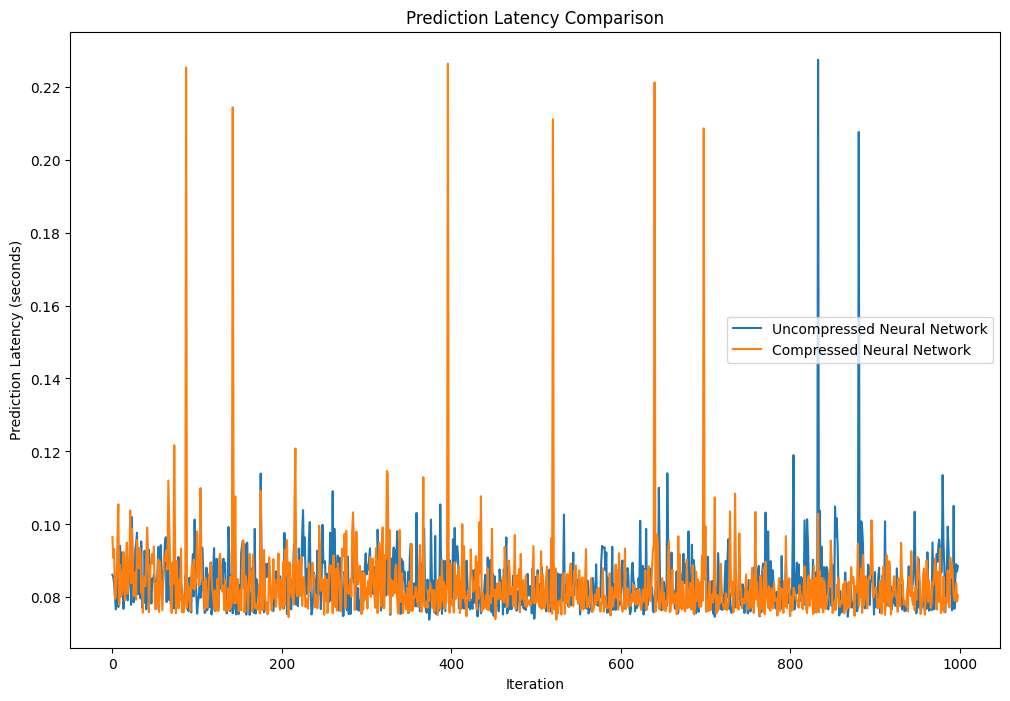

[0.0862106999848038, 0.08553100004792213, 0.08381290000397712, 0.08001269993837923, 0.07669459993485361, 0.07856389996595681, 0.08968779991846532, 0.07736620004288852, 0.09061680000741035, 0.09411070006899536, 0.08819360006600618, 0.0922943000914529, 0.0841541999252513, 0.07687069999519736, 0.08314020000398159, 0.0800675000064075, 0.08040860004257411, 0.0843929999973625, 0.07919919991400093, 0.08370109996758401, 0.08929669996723533, 0.09589320002123713, 0.07793929998297244, 0.10199939995072782, 0.08539929997641593, 0.07865620008669794, 0.08105020003858954, 0.09309420001227409, 0.09474369999952614, 0.09772820002399385, 0.08089400001335889, 0.08913870004471391, 0.08138069999404252, 0.07973189989570528, 0.0953148000407964, 0.07716570002958179, 0.08155310002621263, 0.07843740005046129, 0.09278710000216961, 0.08317040000110865, 0.07673490000888705, 0.08687260001897812, 0.078802700038068, 0.09306659991852939, 0.0895613000029698, 0.08309020008891821, 0.07831869996152818, 0.08515970001462847, 

In [2]:
import time as t
from CustomModelRegistry import DataGenerator, ModelRegistry, get_env_dependencies
from datetime import datetime
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import zlib
import warnings

warnings.filterwarnings("ignore")

# Set up Model Registry Table for Neural Networks
driver_table_compressed = ModelRegistry(datetime(1, 1, 1), 12, 2)  # For Compressed Neural Network
driver_table_uncompressed = ModelRegistry(datetime(1, 1, 1), 12, 2)  # For Uncompressed Neural Network

# Generate Sample Data
n_rows = 100
n_cols = 4
min_value = 1
max_value = 100
noise = 0.5
intercept = 5
slope = 12
start_dt = datetime(2023, 1, 1)

# Instantiate Data Generator Object
data = DataGenerator(start_dt, n_rows, n_cols, min_value, max_value, intercept, noise, slope)

# Get train/test data
X_train, X_test, y_train, y_test = data.get_train_test_data(datetime(2023, 1, 1), datetime(2023, 4, 11))

# Instantiate and compile TensorFlow neural network model (Uncompressed)
tf_model_uncompressed = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression task for y_train
])
tf_model_uncompressed.compile(optimizer='adam', loss='mean_squared_error')

# Convert X_train and y_train to NumPy arrays and ensure the right data type
X_train_np = np.array(X_train.values).astype(np.float32)
y_train_np = np.array(y_train.values).reshape(-1, 1).astype(np.float32)

# Train Uncompressed TensorFlow model
tf_model_uncompressed.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=0)

# Pickle the uncompressed model
tf_pickle_uncompressed = pickle.dumps(tf_model_uncompressed)

# Update driver table with the new uncompressed neural network model
driver_table_uncompressed.update(tf_pickle_uncompressed, {'loss': 'mean_squared_error'}, get_env_dependencies(), datetime(2023, 4, 13))

# Instantiate and compile TensorFlow neural network model (Compressed)
tf_model_compressed = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression task for y_train
])
tf_model_compressed.compile(optimizer='adam', loss='mean_squared_error')

# Train Compressed TensorFlow model
tf_model_compressed.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=0)

# Pickle the compressed model
tf_pickle_compressed = zlib.compress(pickle.dumps(tf_model_compressed))

# Update driver table with the new compressed neural network model
driver_table_compressed.update(tf_pickle_compressed, {'loss': 'mean_squared_error'}, get_env_dependencies(), datetime(2023, 4, 13))

# Prediction Latency Measurement
num_iterations = 1000

# For Uncompressed Neural Network Predictions
prediction_times_uncompressed = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Uncompressed Neural Network
        driver_table_uncompressed.update(tf_pickle_uncompressed, {'loss': 'mean_squared_error'}, get_env_dependencies(), run_date)

        start_time = t.perf_counter()
        # Time to predict
        driver_table_uncompressed.predict(np.array([44, 44, 44, 44]).reshape(1, -1))
        prediction_latency = t.perf_counter()
        prediction_times_uncompressed.append(prediction_latency - start_time)
        print(i)
    except Exception as e:
        print(f"Uncompressed NN Prediction Error {i}: {e}")
        break

# For Compressed Neural Network Predictions
prediction_times_compressed = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Compressed Neural Network
        driver_table_compressed.update(tf_pickle_compressed, {'loss': 'mean_squared_error'}, get_env_dependencies(), run_date)
        start_time = t.perf_counter()
        # Time to predict
        driver_table_compressed.predict(np.array([44, 44, 44, 44]).reshape(1, -1),decompress=True)
        prediction_latency = t.perf_counter()
        prediction_times_compressed.append(prediction_latency - start_time)
        print(i)
    except Exception as e:
        print(f"Compressed NN Prediction Error {i}: {e}")
        break

avg_uncompressed = np.mean(prediction_times_uncompressed)
std_uncompressed = np.std(prediction_times_uncompressed)
print(f"Average Uncompressed Neural Network Prediction Latency: {avg_uncompressed:.6f} seconds (Std Dev: {std_uncompressed:.6f})")

avg_compressed = np.mean(prediction_times_compressed)
std_compressed = np.std(prediction_times_compressed)
print(f"Average Compressed Neural Network Prediction Latency: {avg_compressed:.6f} seconds (Std Dev: {std_compressed:.6f})")

# Plot the prediction latencies for both models
plt.figure(figsize=(12, 8))
plt.plot(prediction_times_uncompressed, label='Uncompressed Neural Network')
plt.plot(prediction_times_compressed, label='Compressed Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Prediction Latency (seconds)')
plt.title('Prediction Latency Comparison')
plt.legend()
plt.show()

print(prediction_times_uncompressed)
print(prediction_times_compressed)


In [3]:
%pip install polars

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


got here 149
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Pandas Prediction 1
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Pandas Prediction 2
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Pandas Prediction 3
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Pandas Prediction 4
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Pandas Prediction 5
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Pandas Prediction 6
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Pandas Prediction 7
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Pandas Prediction 8
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Pandas Prediction 9
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Pandas Prediction 10
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Pandas Prediction 11
got here 149
got here
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Pandas Prediction 12
got here 149
got here
1/

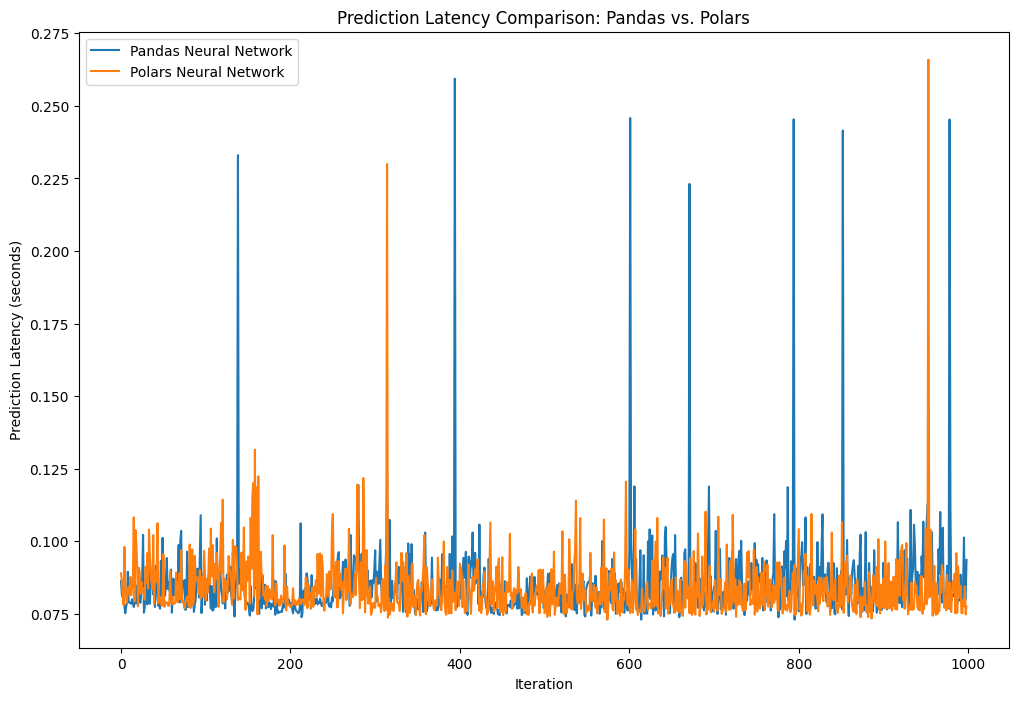

[0.08630920003633946, 0.08165950002148747, 0.08056159992702305, 0.08001759997569025, 0.07746439997572452, 0.07522969995625317, 0.07747270003892481, 0.07888070004992187, 0.08952159993350506, 0.07910930004436523, 0.07882089994382113, 0.07884089997969568, 0.07850709999911487, 0.08008879993576556, 0.07871040003374219, 0.07737199997063726, 0.07870040007401258, 0.08497490000445396, 0.07861119997687638, 0.07858370000030845, 0.08015150006394833, 0.08841179998125881, 0.07915740006137639, 0.07881850004196167, 0.08419009996578097, 0.08743730001151562, 0.10221739998087287, 0.07539330003783107, 0.07752549997530878, 0.08473630005028099, 0.08595019998028874, 0.07828630006406456, 0.08574060001410544, 0.09611869999207556, 0.07850599999073893, 0.08535850001499057, 0.0851794999325648, 0.08852749993093312, 0.0817288999678567, 0.08844710001721978, 0.07738669996615499, 0.09159640001598746, 0.08845540008042008, 0.08041380008216947, 0.07782350003253669, 0.07979250000789762, 0.07677799998782575, 0.093289099982

In [4]:
import time as t
from CustomModelRegistry import DataGenerator, ModelRegistry, get_env_dependencies
from datetime import datetime
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import warnings

import pandas as pd
import polars as pl

warnings.filterwarnings("ignore")

# Set up Model Registry Tables for Pandas and Polars Neural Networks
driver_table_pd = ModelRegistry(datetime(1, 1, 1), 12, 2, library='pandas')  # For Pandas Neural Network
driver_table_pl = ModelRegistry(datetime(1, 1, 1), 12, 2, library='polars')  # For Polars Neural Network

# Generate Sample Data
n_rows = 100
n_cols = 4
min_value = 1
max_value = 100
noise = 0.5
intercept = 5
slope = 12
start_dt = datetime(2023, 1, 1)

# Instantiate Data Generator Object
data = DataGenerator(start_dt, n_rows, n_cols, min_value, max_value, intercept, noise, slope)

# Get train/test data (using Pandas)
X_train_pd, X_test_pd, y_train_pd, y_test_pd = data.get_train_test_data(datetime(2023, 1, 1), datetime(2023, 4, 11))

# Convert to Polars DataFrame
X_train_pl = pl.DataFrame(X_train_pd)
y_train_pl = pl.Series(y_train_pd.values)

# Instantiate and compile TensorFlow neural network model (Pandas)
tf_model_pd = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pd.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression task for y_train
])
tf_model_pd.compile(optimizer='adam', loss='mean_squared_error')

# Convert X_train and y_train to NumPy arrays and ensure the right data type
X_train_np_pd = np.array(X_train_pd.values).astype(np.float32)
y_train_np_pd = np.array(y_train_pd.values).reshape(-1, 1).astype(np.float32)

# Train Pandas TensorFlow model
tf_model_pd.fit(X_train_np_pd, y_train_np_pd, epochs=10, batch_size=32, verbose=0)

# Pickle the Pandas model
tf_pickle_pd = pickle.dumps(tf_model_pd)

# Update driver table with the new Pandas neural network model
driver_table_pd.update(tf_pickle_pd, {'loss': 'mean_squared_error'}, get_env_dependencies(), datetime(2023, 4, 13))

# Instantiate and compile TensorFlow neural network model (Polars)
tf_model_pl = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pl.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression task for y_train
])
tf_model_pl.compile(optimizer='adam', loss='mean_squared_error')

# Convert X_train_pl and y_train_pl to NumPy arrays and ensure the right data type
X_train_np_pl = np.array(X_train_pl.to_numpy()).astype(np.float32)
y_train_np_pl = np.array(y_train_pl.to_numpy()).reshape(-1, 1).astype(np.float32)

# Train Polars TensorFlow model
tf_model_pl.fit(X_train_np_pl, y_train_np_pl, epochs=10, batch_size=32, verbose=0)

# Pickle the Polars model
tf_pickle_pl = pickle.dumps(tf_model_pl)

# Update driver table with the new Polars neural network model
driver_table_pl.update(tf_pickle_pl, {'loss': 'mean_squared_error'}, get_env_dependencies(), datetime(2023, 4, 13))

# Prediction Latency Measurement
num_iterations = 1000

# For Pandas Neural Network Predictions
prediction_times_pd = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Pandas Neural Network
        driver_table_pd.update(tf_pickle_pd, {'loss': 'mean_squared_error'}, get_env_dependencies(), run_date)
        print('got here')
        start_time = t.perf_counter()
        # Time to predict
        driver_table_pd.predict(np.array([44, 44, 44, 44]).reshape(1, -1))
        prediction_latency = t.perf_counter()
        prediction_times_pd.append(prediction_latency - start_time)
        print(f"Pandas Prediction {i}")
    except Exception as e:
        print(f"Pandas NN Prediction Error {i}: {e}")
        break

# For Polars Neural Network Predictions
prediction_times_pl = []
for i in range(1, num_iterations):
    try:
        year = random.randint(2000, 2025)
        month = random.randint(1, 12)
        day = random.randint(1, 28)

        run_date = datetime(year, month, day)
        # Add record for Polars Neural Network
        driver_table_pl.update(tf_pickle_pl, {'loss': 'mean_squared_error'}, get_env_dependencies(), run_date)

        start_time = t.perf_counter()
        # Time to predict
        driver_table_pl.predict(np.array([44, 44, 44, 44]).reshape(1, -1))
        prediction_latency = t.perf_counter()
        prediction_times_pl.append(prediction_latency - start_time)
        print(f"Polars Prediction {i}")
    except Exception as e:
        print(f"Polars NN Prediction Error {i}: {e}")
        break


# Output average latencies and standard deviations for Pandas Neural Network
avg_pd = np.mean(prediction_times_pd)
std_pd = np.std(prediction_times_pd)
print(f"Average Pandas Neural Network Prediction Latency: {avg_pd:.6f} seconds (Std Dev: {std_pd:.6f})")

# Output average latencies and standard deviations for Polars Neural Network
avg_pl = np.mean(prediction_times_pl)
std_pl = np.std(prediction_times_pl)
print(f"Average Polars Neural Network Prediction Latency: {avg_pl:.6f} seconds (Std Dev: {std_pl:.6f})")

# Plot the prediction latencies for both models
plt.figure(figsize=(12, 8))
plt.plot(prediction_times_pd, label='Pandas Neural Network')
plt.plot(prediction_times_pl, label='Polars Neural Network')
plt.xlabel('Iteration')
plt.ylabel('Prediction Latency (seconds)')
plt.title('Prediction Latency Comparison: Pandas vs. Polars')
plt.legend()
plt.show()

print(prediction_times_pd)
print(prediction_times_pl)
